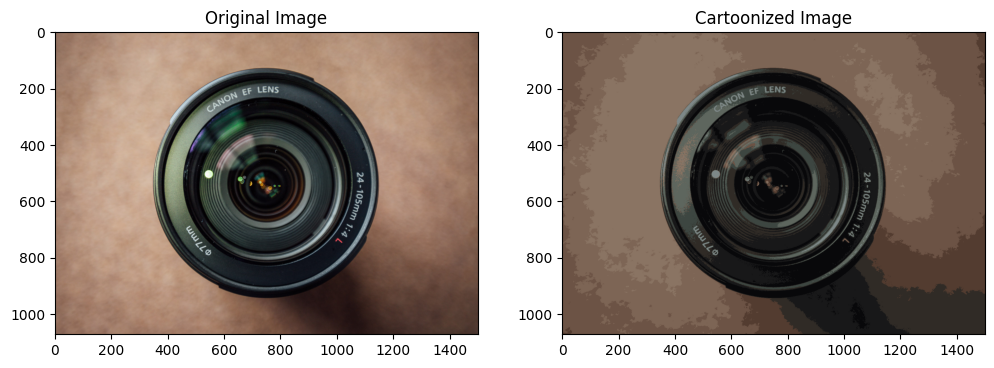

In [30]:
# @title K-means clustering
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

def convert_to_cartoon(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to RGB color space
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply Canny edge detection to extract the edges
    edges = cv2.Canny(image_rgb, 100, 200)

    # Apply K-means clustering to reduce the number of colors
    pixel_values = image_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 10  # Number of clusters
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    cartoon_image = centers[labels.flatten()]
    cartoon_image = cartoon_image.reshape(image_rgb.shape)

    # Convert the edges to BGR color space
    edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Combine the cartoon image with the edges
    cartoon = cartoon_image + edges_bgr

    # Adjust the brightness of the cartoonized image
    brightness_factor = 0.7  # Increase this value to make the image brighter
    cartoon_brighter = cv2.convertScaleAbs(cartoon, alpha=brightness_factor, beta=0)

    # Display the original image and the cartoonized image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cartoon_brighter)
    plt.title('Cartoonized Image')

    plt.show()

# Provide the path to image
image_path = '/content/image3.jpg'

# Convert the image to a cartoon
convert_to_cartoon(image_path)

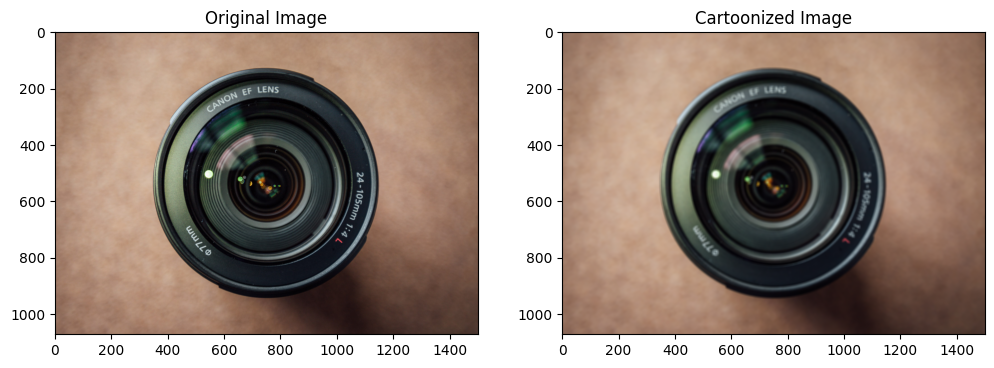

In [34]:
# @title Average Filter
import cv2
import numpy as np
from matplotlib import pyplot as plt

def convert_to_cartoon(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to RGB color space
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply average filtering to reduce noise and smooth the image
    kernel_size = (10, 10)
    smoothed = cv2.blur(image_rgb, kernel_size)

    # Convert the smoothed image to grayscale
    gray = cv2.cvtColor(smoothed, cv2.COLOR_RGB2GRAY)

    # Apply Canny edge detection to extract the edges
    edges = cv2.Canny(gray, 50, 25)

    # Convert the edges to BGR color space
    edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Combine the edges with the black image
    cartoon = edges_bgr + smoothed

    # Display the original image and the cartoonized image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cartoon)
    plt.title('Cartoonized Image')

    plt.show()

# Provide the path to image
image_path = '/content/image3.jpg'

# Convert the image to a cartoon
convert_to_cartoon(image_path)

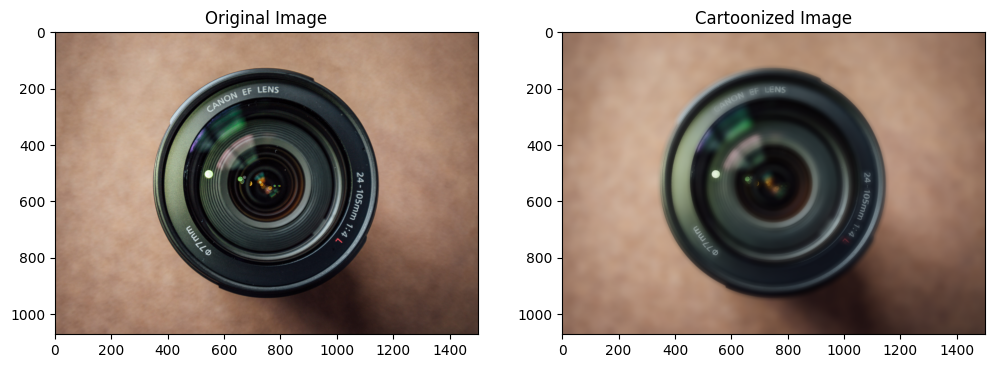

In [35]:
# @title Bilateral Filter
import cv2
import numpy as np
from matplotlib import pyplot as plt

def convert_to_cartoon(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to RGB color space
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply bilateral filtering to reduce noise while preserving edges
    smoothed = cv2.bilateralFilter(image_rgb, 31, 250, 250)

    # Convert the smoothed image to grayscale
    gray = cv2.cvtColor(smoothed, cv2.COLOR_RGB2GRAY)

    # Apply Canny edge detection to extract the edges
    edges = cv2.Canny(gray, 100, 255)

    # Convert the edges to BGR color space
    edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Create a black image of the same size as the original image
    black_image = np.zeros_like(image_rgb)

    # Combine the edges with the black image
    cartoon = smoothed + edges_bgr

    # Display the original image and the cartoonized image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cartoon)
    plt.title('Cartoonized Image')

    plt.show()

# Provide the path to image
image_path = '/content/image3.jpg'

# Convert the image to a cartoon with Canny edge detection
convert_to_cartoon(image_path)